# IMPORT  THE NECESSARY PACKAGES

In [1]:
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
import dlib
import cv2

# EXTRACT EYES LANDMARKS WITH DLIB

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(".\\dlib_shape_predictor\\shape_predictor_68_face_landmarks.dat")

In [3]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [4]:
print(f"Right eye indices: from {rStart} to {rEnd}")
print(f"Left eye indices: from {lStart} to {lEnd}")

Right eye indices: from 36 to 42
Left eye indices: from 42 to 48


In [5]:
def extract_eyes_landmarks(landmarks,rStart,rEnd,lStart,lEnd):
    shape = face_utils.shape_to_np(landmarks)
    rightEye = shape[rStart:rEnd]
    leftEye = shape[lStart:lEnd]
    return rightEye,leftEye

In [6]:
def draw_eyes_landmarks(image):
    
    faces= detector(image)
    for face in faces:
        landmarks = predictor(image, face)
        #(bX, bY, bW, bH) = face_utils.rect_to_bb(face)
        #cv2.rectangle(image, (bX, bY), (bX + bW, bY + bH), (0, 255, 0), 1)
        for i in range(rStart, lEnd):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  
        rightEye,leftEye=extract_eyes_landmarks(landmarks,rStart,rEnd,lStart,lEnd)
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(image, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(image, [rightEyeHull], -1, (0, 255, 0), 1)
        return image,rightEye,leftEye

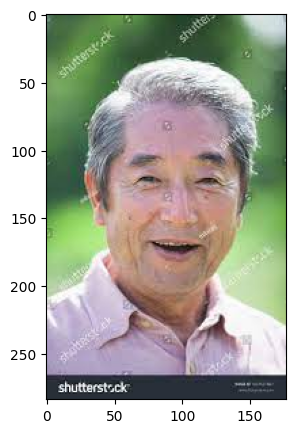

In [7]:
plt.figure(figsize=(15,5))
test_img=cv2.imread("picpic.jpg")
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

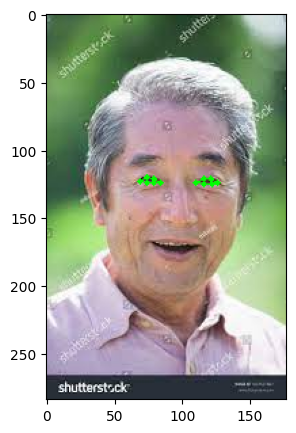

In [8]:
plt.figure(figsize=(15,5))
test_img,rightEye,leftEye=draw_eyes_landmarks(test_img)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

# Eye Aspect Ratio (EAR) function

In [9]:
# euclidean distance
def euclidean_dist(ptA, ptB):
	return np.linalg.norm(ptA - ptB)
# EAR 
def eye_aspect_ratio(eye):
	A = euclidean_dist(eye[1], eye[5])
	B = euclidean_dist(eye[2], eye[4])
	C = euclidean_dist(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [10]:
def compute_avg_EAR(righteye,lefteye):
    return round(((eye_aspect_ratio(righteye)+eye_aspect_ratio(lefteye))/2),3)

TEST

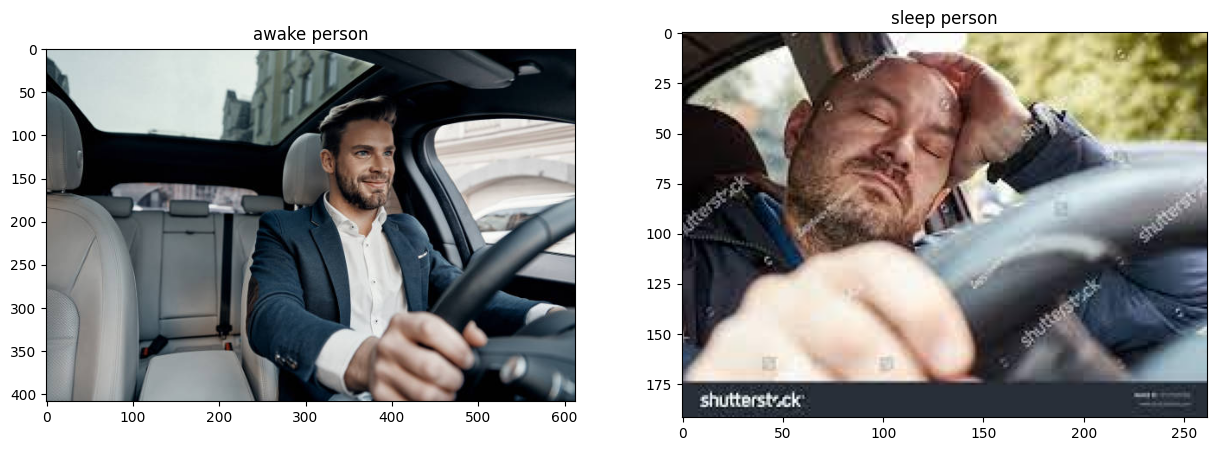

In [11]:
test_awake_img=cv2.imread(".\\images_test\\test_awake.jpg")
test_sleep_img=cv2.imread(".\\images_test\\sleep.jpg")
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(test_awake_img, cv2.COLOR_BGR2RGB))
axs[0].set_title('awake person')
axs[1].imshow(cv2.cvtColor(test_sleep_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('sleep person')
plt.show()

In [12]:
test_awake_img,rightEyeA,leftEyeA=draw_eyes_landmarks(test_awake_img)
test_sleep_img,rightEyeS,leftEyeS=draw_eyes_landmarks(test_sleep_img)
EAR_awake=compute_avg_EAR(rightEyeA,leftEyeA)
EAR_sleep=compute_avg_EAR(rightEyeS,leftEyeS)

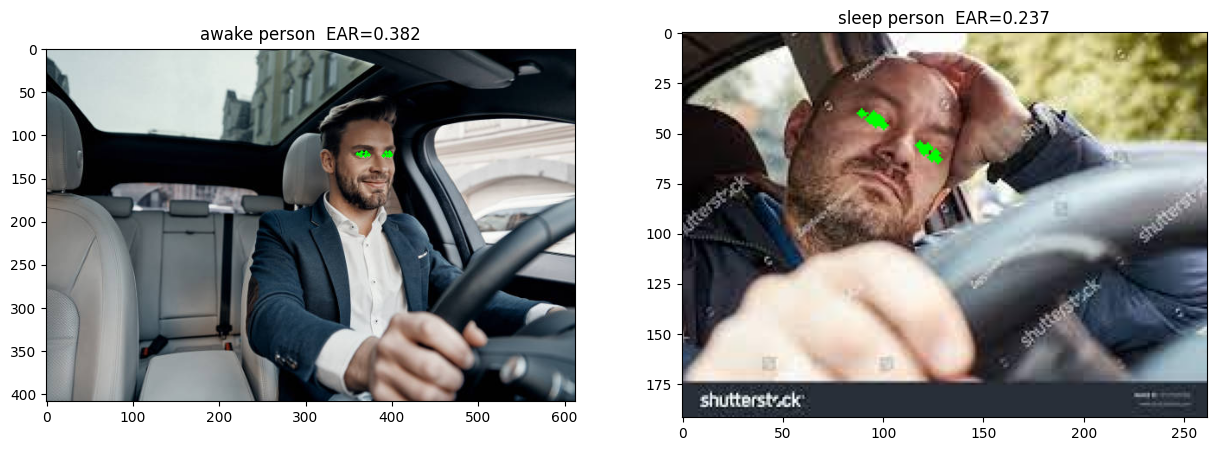

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(test_awake_img, cv2.COLOR_BGR2RGB))
axs[0].set_title(f'awake person  EAR={EAR_awake}')
axs[1].imshow(cv2.cvtColor(test_sleep_img, cv2.COLOR_BGR2RGB))
axs[1].set_title(f'sleep person  EAR={EAR_sleep}')
plt.show()

WebCam app

In [14]:
def calculate_fps(frame_count, start_time):
    end_time = cv2.getTickCount()
    elapsed_time = (end_time - start_time) / cv2.getTickFrequency()
    fps = frame_count / elapsed_time
    return fps

In [15]:
import pygame

def play_alert_sound():
    pygame.mixer.init()
    pygame.mixer.music.load("alert.mp3")  # Replace "alert_sound.wav" with the path to your sound file.
    pygame.mixer.music.play()

pygame 2.5.0 (SDL 2.28.0, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [16]:
def main():    
    cap = cv2.VideoCapture(0)
    frame_count = 0
    start_time = cv2.getTickCount()
    ear_threshold=0.25
    consecutive_frames=0
    is_sound_enabled = True
    while True:
            ret, frame = cap.read()
            frame = cv2.flip(frame, 1)
            faces = detector(frame)
            frame_count += 1
            fps = calculate_fps(frame_count, start_time)
            #cv2.putText(frame, f"FPS: {fps:.2f}", (5, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 180), 2)
            for face in faces:
                landmarks = predictor(frame, face)
                for n in range(rStart, lEnd):
                    x = landmarks.part(n).x
                    y = landmarks.part(n).y
                    cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
                rightEye,leftEye=extract_eyes_landmarks(landmarks,rStart,rEnd,lStart,lEnd)
                rightEye,leftEye=extract_eyes_landmarks(landmarks,rStart,rEnd,lStart,lEnd)
                leftEyeHull = cv2.convexHull(leftEye)
                rightEyeHull = cv2.convexHull(rightEye)
                cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
                cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
                EAR=compute_avg_EAR(rightEye,leftEye)
                cv2.putText(frame, f"EAR={EAR}", (500, 20),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                if EAR < ear_threshold:
                    consecutive_frames += 1
                    sound_played = False
                else:
                    consecutive_frames = 0
                if consecutive_frames > 20 and not sound_played:
                # Display the alert overlay on the frame
                    cv2.putText(frame, "ALERT!", (frame.shape[0]//2, frame.shape[1]//2), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 5, cv2.LINE_AA)
                    if is_sound_enabled:
                        play_alert_sound()
                        sound_played = True
                    consecutive_frames = 0

                if EAR > 0.25:
                    sound_played = False


            cv2.imshow("Facial Landmarks", frame)

            if cv2.waitKey(1) == ord('e'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [17]:
main()